**CLASSIFIYING NEWSWIRES**

 You’ll work with the Reuters dataset, a set of short newswires and their topics, published
 by Reuters in 1986. It’s a simple, widely used toy dataset for text classification. There
 are 46 different topics; some topics are more represented than others, but each topic
 has at least 10 examples in the training set.

In [1]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
 num_words=10000)

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 2s 1us/step


The argument num_words=10000 restricts the data to the
 10,000 most frequently occurring words found in the data.

In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

In [4]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

Each example is a list of integers (word indices)

In [5]:
train_labels[10]

3

The label associated with an example is an integer between 0 and 45—a topic index

**Preparing the data**

 Encoding the data

In [6]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
   results = np.zeros((len(sequences), dimension))
   for i, sequence in enumerate(sequences):
     results[i, sequence] = 1.
   return results
 
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

To vectorize the labels, there are two possibilities: you can cast the label list as an inte
ger tensor, or you can use one-hot encoding. One-hot encoding is a widely used for
mat for categorical data, also called categorical encoding.

 one-hot encoding of
 the labels consists of embedding each label as an all-zero vector with a 1 in the place of
 the label index. 

In [7]:
def to_one_hot(labels, dimension=46):
   results = np.zeros((len(labels), dimension))
   for i, label in enumerate(labels):
     results[i, label] = 1.
   return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

There is a built-in way to do this in Keras:

In [9]:
from tensorflow.keras import utils

# Your existing code
one_hot_train_labels = utils.to_categorical(train_labels)
one_hot_test_labels = utils.to_categorical(test_labels)


 Model definition

In [10]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 Compiling the model

In [11]:
model.compile(optimizer='rmsprop',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

Setting aside a validation set

Let’s set apart 1,000 samples in the training data to use as a validation set.

In [12]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

Now, let’s train the network for 20 epochs.

In [13]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.3499 - loss: 3.2949 - val_accuracy: 0.6010 - val_loss: 1.9639
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6569 - loss: 1.7529 - val_accuracy: 0.6900 - val_loss: 1.4070
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7262 - loss: 1.2655 - val_accuracy: 0.7250 - val_loss: 1.2305
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.7898 - loss: 0.9867 - val_accuracy: 0.7530 - val_loss: 1.0946
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8177 - loss: 0.8526 - val_accuracy: 0.7680 - val_loss: 1.0310
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8482 - loss: 0.7117 - val_accuracy: 0.7840 - val_loss: 0.9771
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8802 - loss: 0.5846 - val_accuracy: 0.8050 - val_loss: 0.9330
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9008 - loss: 0.4971 - val_accuracy: 0.8080 - v

 Plotting the training and validation loss

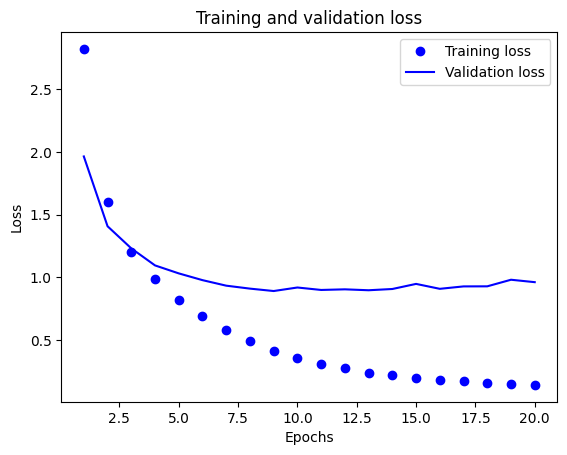

In [14]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

 Plotting the training and validation accuracy

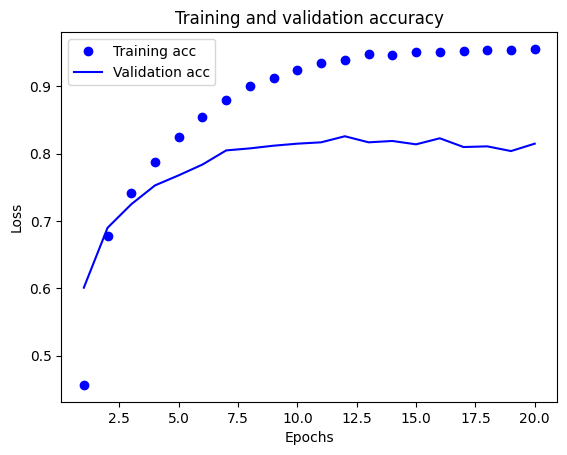

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

The network begins to overfit after nine epochs. Let’s train a new network from
 scratch for nine epochs and then evaluate it on the test set.

In [18]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

model.fit(partial_x_train,
                partial_y_train,
                epochs=9,
                batch_size=512,
                validation_data=(x_val, y_val))
 
results = model.evaluate(x_test, one_hot_test_labels)

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.3865 - loss: 3.2023 - val_accuracy: 0.5870 - val_loss: 1.8704
Epoch 2/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6471 - loss: 1.6573 - val_accuracy: 0.6920 - val_loss: 1.4038
Epoch 3/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7367 - loss: 1.2216 - val_accuracy: 0.7420 - val_loss: 1.1998
Epoch 4/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7791 - loss: 1.0281 - val_accuracy: 0.7550 - val_loss: 1.0976
Epoch 5/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8238 - loss: 0.8106 - val_accuracy: 0.7660 - val_loss: 1.0150
Epoch 6/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8575 - loss: 0.6696 - val_accuracy: 0.7740 - val_loss: 0.9825
Epoch 7/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8865 - loss: 0.5551 - val_accuracy: 0.7970 - val_loss: 0.9425
Epoch 8/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8929 - loss: 0.4859 - val_accuracy: 0.8140 - val_loss:

Here are the final results:

In [19]:
results

[0.9531989097595215, 0.7898486256599426]

This approach reaches an accuracy of ~80%. 

Generating predictions on new data

In [20]:
predictions = model.predict(x_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


Each entry in predictions is a vector of length 46:

In [21]:
predictions[0].shape

(46,)

The coefficients in this vector sum to 1:

In [22]:
np.sum(predictions[0])

0.9999998

The largest entry is the predicted class—the class with the highest probability:

In [23]:
np.argmax(predictions[0])

3